In [2]:
# Data handling libraries
import pandas as pd
pd.options.display.max_rows = 10000
import numpy as np

# File manipulation libraries
import os
import pickle

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
# Have to run this from the folder with the csv's saved
root_folder = os.getcwd()

file_names = ['Territorial Emissions GCB', 'Consumption Emissions GCB', 'Emissions Transfers GCB', 'Territorial Emissions CDIAC']
cdiac_dataframes_clean = {}
for file in file_names:
    cdiac_dataframes_clean[file] = pd.read_csv(root_folder+"/"+file+".csv", index_col=[0])

In [16]:
cdiac_dataframes_clean["Territorial Emissions GCB"].head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
1959,0.105,0.394,1.545,NaN,0.169,NaN,0.008,13.362,0.618067,0.196335,...,366.568167,11.038,1005.675833,19.320,836.982,25.898,53.806,58.234,36.096,2454.0
1960,0.113,0.552,1.680,NaN,0.150,NaN,0.010,13.312,0.643505,0.168821,...,401.412161,9.891,1067.053839,24.645,858.186,27.509,54.423,65.022,18.093,2569.0
1961,0.134,0.622,1.654,NaN,0.124,NaN,0.013,13.957,0.663625,0.176188,...,360.997968,10.468,1103.737032,25.794,856.377,28.231,55.130,71.845,23.161,2580.0
1962,0.188,0.672,1.546,NaN,0.322,NaN,0.028,14.643,0.696505,0.193489,...,343.544533,12.263,1165.390467,29.837,888.601,29.196,58.890,74.403,38.429,2686.0
1963,0.193,0.568,1.480,NaN,0.314,NaN,0.023,13.658,0.746957,0.185341,...,362.248395,10.549,1247.494605,33.740,926.389,31.166,59.917,77.821,35.492,2833.0


In [112]:
# Convert raw data to percent change by year from 2000 forward

sheet_name = "Territorial Emissions GCB"
territorial_emissions_abs_raw = cdiac_dataframes_clean[sheet_name]

territory_gcb = territorial_emissions_abs_raw.loc[1999:2015].transpose().pct_change(axis=1).loc[:,2000:]
territory_gcb.to_csv(root_folder + "/TerritorialEmissionsGCB.csv")

sheet_name = "Consumption Emissions GCB"
consumption_emissions_abs_raw = cdiac_dataframes_clean[sheet_name]

consumption_gcb = consumption_emissions_abs_raw.loc[1999:2015].transpose().pct_change(axis=1).loc[:,2000:]
consumption_gcb.to_csv(root_folder + "/ConsumptionEmissionsGCB.csv")

In [7]:
territory_gcb

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Afghanistan,-0.058036,-0.175355,0.385057,0.161826,-0.075000,0.397683,0.243094,0.377778,0.854839,0.606957,0.250000,0.446320,0.669560,0.039799,0.066971,0.014678
Albania,0.012285,0.066748,0.163823,0.144673,-0.029889,0.021127,-0.083621,0.007526,0.113912,0.000838,0.050251,0.139553,-0.100770,0.021790,-0.003732,0.012003
Algeria,-0.045460,-0.041370,0.077827,0.018486,-0.032853,0.197050,-0.055658,0.082355,0.007334,0.100934,-0.018572,0.016862,0.072622,0.032527,0.072584,0.042386
Andorra,0.021429,0.000000,0.013986,0.006897,0.054795,0.019481,-0.050955,-0.013423,0.000000,-0.040816,0.000000,-0.049645,0.000000,0.000000,0.007104,0.007376
Angola,0.042050,0.019985,0.301432,-0.284308,1.073220,0.019317,0.162328,0.129611,0.022161,0.081016,0.045521,0.044170,0.100798,-0.027997,-0.000545,0.016048
Anguilla,0.214286,0.529412,0.000000,0.076923,0.178571,0.060606,0.114286,0.051282,0.000000,-0.024390,0.025000,-0.048780,0.000000,-0.051282,0.024332,0.022473
Antigua and Barbuda,-0.010526,0.000000,0.053191,0.070707,0.047170,0.009009,0.035714,0.103448,0.023438,0.061069,0.028777,-0.020979,0.021429,0.000000,0.024332,0.022473
Argentina,-0.032982,-0.059209,-0.067350,0.082976,0.166784,0.028691,0.082202,-0.001484,0.079525,-0.048361,0.044217,0.019767,0.003789,-0.013211,0.006123,0.013803
Armenia,0.149635,0.022222,-0.140787,0.126506,0.063102,0.194165,0.006740,0.155649,0.097755,-0.215699,-0.032801,0.166087,0.158091,-0.034771,-0.005989,0.023555
Aruba,0.327044,0.015798,0.006221,0.018547,0.001517,0.031818,0.000000,0.038179,-0.032532,0.005848,-0.026163,-0.007463,-0.466165,-0.326761,0.024332,0.022473


In [89]:
# Align the CDIAC and World Bank Country Names
country_names = pd.ExcelFile("/Users/nathansuberi/Downloads/country name crosswalk.xlsx").parse("Sheet1")
slim_set = country_names.drop(["Country Names", "Unnamed: 1", "Unnamed: 3",  "Unnamed: 5", "Unnamed: 6"], axis=1)
slim_set.columns = ["cdiac_names", "wb_names"]
slim_set = slim_set.iloc[3:-51]
slim_set.set_index("cdiac_names", inplace=True)

# See Bahamas for an example of a difference
slim_set.head(40)

,wb_names
cdiac_names,
Albania,Albania
Algeria,Algeria
Andorra,Andorra
Angola,Angola
Argentina,Argentina
Antigua and Barbuda,Antigua and Barbuda
Armenia,Armenia
Australia,Australia
Austria,Austria


In [90]:
len(slim_set)

183

In [91]:
## Helper functions

def replace_congo(name):
    if name == "Congo":
        return("Congo (Rep)")
    else:
        return(name)
    
def fetch_name(name):
    try:
        return(slim_set.loc[name][0])
    except:
        return(np.nan)
    

In [92]:
# Name for Congo didn't match in the CDIAC data and crosswalk file
territory_gcb.index = map(replace_congo, territory_gcb.index)
consumption_gcb.index = map(replace_congo, consumption_gcb.index)

# Add the wb_name to each dataframe
territory_gcb["wb_name"] = territory_gcb.apply(lambda row: fetch_name(row.name), axis=1)
consumption_gcb["wb_name"] = consumption_gcb.apply(lambda row: fetch_name(row.name), axis=1)

# Export to csv... still no ISO3 though
territory_gcb.set_index("wb_name").to_csv(root_folder + "/wb_names_territory_gcb.csv")
consumption_gcb.set_index("wb_name").to_csv(root_folder + "/wb_names_consumption_gcb.csv")

In [ ]:
### Evaluate whether Null items are the same between Consumption and Territory emissions data

In [93]:
print(sum(pd.isnull(consumption_gcb["wb_name"])))
list1 = consumption_gcb["wb_name"].loc[pd.isnull(consumption_gcb["wb_name"])].index

print(sum(pd.isnull(territory_gcb["wb_name"])))
list2 = territory_gcb["wb_name"].loc[pd.isnull(territory_gcb["wb_name"])].index

# This includes Bunkers and Statistical Difference - reason for extra indices
[(True if (item in list1) else False) for item in list2]

50
52


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False]

In [94]:
# Only keep the CDIAC data where there is a matching world bank country
territory_gcb = territory_gcb.loc[pd.notnull(territory_gcb["wb_name"])]
consumption_gcb = consumption_gcb.loc[pd.notnull(consumption_gcb["wb_name"])]

In [95]:
# This shows the total nmber of remaining countries in the data
list1 = consumption_gcb.index
list2 = territory_gcb.index

print(sum([(True if (item in list2) else False) for item in list1]))
print(sum([(True if (item in list2) else False) for item in list1]))

182
182


In [96]:
### Add isos on to the data

territory_gcb = territory_gcb.set_index("wb_name")
consumption_gcb = consumption_gcb.set_index("wb_name")

In [97]:
isos = pd.read_csv("/Users/nathansuberi/Desktop/WRI_Programming/world_bank_isos.csv", sep="\n", header=None)
isos = list(isos[0])

In [98]:
pairs = []
for ix, val in enumerate(isos):
    if ix%3==0:
        key = val
    elif ix%3==1:
        value = val
        pairs.append([key,value])

real_isos = pd.DataFrame(pairs, columns=["Country", "ISO"])
real_isos.set_index("Country", inplace=True)

In [99]:
real_isos.head()

,ISO
Country,
Afghanistan,AFG
Albania,ALB
Algeria,DZA
American Samoa,ASM
Andorra,AND


In [100]:
### Helper functions

def replace_iso_names(name):
    if name == "Brunei":
        return("Brunei Darussalam")
    elif name == "Cape Verde":
        return("Cabo Verde")
    elif name == "Ethiopia (excludes Eritrea)":
        return("Ethiopia")
    elif name == "Hong Kong, China":
        return("Hong Kong SAR, China")
    elif name == "Macao":
        return("Macao SAR, China")
    elif name == "Venezuela":
        return("Venezuela, RB")
    else:
        return(name)
    
def add_iso(name):
    try:
        return(real_isos.loc[name,"ISO"])
    except:
        return(np.nan)

In [101]:
# Some ISOs have to be manuallya djusted

# Montenegro = MNE
# Serbia = SRB    
real_isos.index = map(replace_iso_names, real_isos.index)
real_isos.loc["Montenegro"] = "MNE"
real_isos.loc["Serbia"] = "SRB"

In [102]:
territory_gcb["ISO"] = territory_gcb.apply(lambda row: add_iso(row.name), axis=1)
consumption_gcb["ISO"] = consumption_gcb.apply(lambda row: add_iso(row.name), axis=1)

In [103]:
# All countries have an assigned iso
territory_gcb.loc[pd.isnull(territory_gcb["ISO"])]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,ISO
wb_name,,,,,,,,,,,,,,,,,


In [104]:
territory_gcb.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,ISO
wb_name,,,,,,,,,,,,,,,,,
Albania,0.012285,0.066748,0.163823,0.144673,-0.029889,0.021127,-0.083621,0.007526,0.113912,0.000838,0.050251,0.139553,-0.100770,0.021790,-0.003732,0.012003,ALB
Algeria,-0.045460,-0.041370,0.077827,0.018486,-0.032853,0.197050,-0.055658,0.082355,0.007334,0.100934,-0.018572,0.016862,0.072622,0.032527,0.072584,0.042386,DZA
Andorra,0.021429,0.000000,0.013986,0.006897,0.054795,0.019481,-0.050955,-0.013423,0.000000,-0.040816,0.000000,-0.049645,0.000000,0.000000,0.007104,0.007376,AND
Angola,0.042050,0.019985,0.301432,-0.284308,1.073220,0.019317,0.162328,0.129611,0.022161,0.081016,0.045521,0.044170,0.100798,-0.027997,-0.000545,0.016048,AGO
Antigua and Barbuda,-0.010526,0.000000,0.053191,0.070707,0.047170,0.009009,0.035714,0.103448,0.023438,0.061069,0.028777,-0.020979,0.021429,0.000000,0.024332,0.022473,ATG


In [105]:
# Export final files
territory_gcb.to_csv("./wb_names_only_with_iso_territory_gcb.csv")
consumption_gcb.to_csv("./wb_names_only_with_iso_consumption_gcb.csv")

In [107]:
# Process GDP data

gdp_data = pd.read_csv("/Users/nathansuberi/Downloads/country GDP 1999-2016.csv")
tmp = gdp_data.transpose().drop(["Series Name", "Series Code", "Country Code", '2016 [YR2016]']).transpose().set_index("Country Name")
tmp.columns = range(1999, 2016)
country_gdp = tmp.convert_objects(convert_numeric=True).pct_change(axis=1).iloc[0:-8].loc[:,2000:]
country_gdp.to_csv(root_folder + "/Country_GDPs.csv")


/Users/nathansuberi/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [108]:
country_gdp["ISO"] = country_gdp.apply(lambda row: add_iso(row.name), axis=1)
# All countries have an assigned iso
country_gdp.loc[pd.isnull(country_gdp["ISO"])]

country_gdp.to_csv(root_folder + "/Country_GDPs_with_isos.csv")

In [123]:
# Convert raw data to percent change by year from 2000 forward

consumption_emissions_abs = consumption_emissions_abs_raw.loc[2000:].transpose()
territorial_emissions_abs = territorial_emissions_abs_raw.loc[2000:].transpose()

terr_over_cons_abs= territorial_emissions_abs.div(consumption_emissions_abs)
# Name for Congo didn't match in the CDIAC data and crosswalk file
terr_over_cons_abs.index = map(replace_congo, terr_over_cons_abs.index)
# Add the wb_name to each dataframe
terr_over_cons_abs["wb_name"] = terr_over_cons_abs.apply(lambda row: fetch_name(row.name), axis=1)
terr_over_cons_abs = terr_over_cons_abs .loc[pd.notnull(terr_over_cons_abs["wb_name"])]
# Only keep the CDIAC data where there is a matching world bank country
terr_over_cons_abs["ISO"] = terr_over_cons_abs.apply(lambda row: add_iso(row.name), axis=1)


# Add in wb_names and ISO codes

In [126]:
terr_over_cons_abs.to_csv(root_folder + "/territorial_emissions_divided_by_consumption_emissions.csv")
terr_over_cons_abs.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,wb_name,ISO
Albania,0.800594,0.797292,0.754797,0.777339,0.781501,0.722446,0.701079,0.705743,0.720629,0.703902,0.759592,0.835117,0.803945,0.850623,0.852638,NaN,Albania,ALB
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria,DZA
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola,AGO
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,ATG
Argentina,0.983844,1.001218,1.343218,1.180393,1.173823,1.135851,1.105193,1.059628,1.052773,1.068888,1.032187,1.015731,0.998175,0.967498,0.975843,NaN,Argentina,ARG
Armenia,0.847929,0.836301,0.819222,0.776985,0.813314,0.785006,0.784651,0.663564,0.800722,0.714944,0.737157,0.823920,0.864960,0.854448,0.891217,NaN,Armenia,ARM
Australia,1.210696,1.209157,1.143223,1.108805,1.096936,1.111065,1.074477,1.051683,1.088941,1.038934,1.040812,1.017913,0.978117,1.012445,1.012342,NaN,Australia,AUS
Austria,0.703480,0.725991,0.739643,0.780930,0.761119,0.755247,0.716800,0.724654,0.734706,0.729986,0.740051,0.697224,0.709868,0.726156,0.711418,NaN,Austria,AUT
Azerbaijan,1.128780,1.088839,0.993185,0.905761,0.885194,0.981340,0.965286,0.951102,0.988968,0.984856,0.986843,0.985668,0.959886,0.925140,0.914798,NaN,Azerbaijan,AZE


In [127]:
territory_gcb = territorial_emissions_abs_raw.loc[1999:2015].transpose().pct_change(axis=1).loc[:,2000:]
consumption_gcb = consumption_emissions_abs_raw.loc[1999:2015].transpose().pct_change(axis=1).loc[:,2000:]

terr_over_cons_per_change= territory_gcb.div(consumption_gcb)
# Name for Congo didn't match in the CDIAC data and crosswalk file
terr_over_cons_per_change.index = map(replace_congo, terr_over_cons_per_change.index)
# Add the wb_name to each dataframe
terr_over_cons_per_change["wb_name"] = terr_over_cons_per_change.apply(lambda row: fetch_name(row.name), axis=1)
terr_over_cons_per_change = terr_over_cons_per_change.loc[pd.notnull(terr_over_cons_per_change["wb_name"])]
# Only keep the CDIAC data where there is a matching world bank country
terr_over_cons_per_change["ISO"] = terr_over_cons_per_change.apply(lambda row: add_iso(row.name), axis=1)


In [128]:
terr_over_cons_per_change.to_csv(root_folder + "/territorial_emissions_divided_by_consumption_emissions_per_change.csv")
terr_over_cons_per_change.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,wb_name,ISO
Albania,0.299566,0.937917,0.714305,1.297753,0.852608,0.201983,1.501487,8.674855,1.253137,0.034044,-1.878641,3.823670,1.529034,-0.635643,0.613108,NaN,Albania,ALB
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria,DZA
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola,AGO
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,ATG
Argentina,0.581948,0.783871,0.220955,0.357095,0.962319,0.454829,0.732496,-0.035800,0.918788,0.771202,0.543570,0.544728,0.176683,-0.730784,-2.467890,NaN,Argentina,ARG
Armenia,-0.696074,0.609916,1.145786,0.673826,4.041062,0.818478,0.936670,0.424652,-1.082767,1.773853,0.529499,3.836359,1.532735,1.518618,0.127423,NaN,Armenia,ARM
Australia,-0.971258,0.944659,0.167798,0.361899,0.761402,-4.828712,0.294246,0.470558,-0.644656,0.176394,0.754025,-0.378882,0.142905,0.415051,1.010667,NaN,Australia,AUS
Austria,1.078531,2.181483,3.684767,3.327423,0.151761,0.659681,-1.801437,0.768139,0.166104,1.073604,1.255366,-1.042332,0.685523,-0.204181,1.563294,NaN,Austria,AUT
Azerbaijan,-1.009992,-2.315514,0.228219,0.253049,0.664107,-2.013579,0.881145,1.055468,1.373974,1.038411,0.951995,0.985797,0.688276,0.061686,0.798162,NaN,Azerbaijan,AZE


In [26]:
country_gdp

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ISO,,,,,,,,,,,,,,,,,
ALB,Albania,0.066666,0.079403,0.042314,0.057735,0.057096,0.057208,0.054310,0.059000,0.075300,0.033500,0.037100,0.025500,0.014200,0.011100,0.018000,0.025900
DZA,Algeria,0.038200,0.030084,0.056090,0.072016,0.043020,0.059077,0.016843,0.033730,0.023601,0.016321,0.036341,0.028919,0.033750,0.027673,0.037892,0.037635
AND,Andorra,0.011658,0.060668,0.064268,0.120239,0.080695,0.078397,0.045853,0.000780,-0.085943,-0.038180,-0.053480,-0.048027,-0.017600,-0.000635,NaN,NaN
AGO,Angola,0.030121,0.042210,-0.069405,0.052475,0.108796,0.182615,0.207351,0.225931,0.138171,0.024129,0.034077,0.039186,0.051554,0.068136,0.048042,0.030074
ATG,Antigua and Barbuda,0.060846,-0.051962,0.010877,0.061105,0.058114,0.062873,0.128050,0.092896,0.000477,-0.120356,-0.070417,-0.017633,0.038375,-0.002001,0.046028,0.041270
ARG,Argentina,-0.007888,-0.044089,-0.108945,0.088369,0.090297,0.088515,0.080472,0.090078,0.040572,-0.059187,0.101254,0.060041,-0.010264,0.024052,-0.025126,0.026472
ARM,Armenia,0.059000,0.095566,0.131863,0.140408,0.104678,0.138657,0.131980,0.137492,0.069000,-0.141500,0.022000,0.047000,0.072000,0.033000,0.036000,0.030000
AUS,Australia,0.038678,0.019301,0.038530,0.030683,0.041457,0.032036,0.029777,0.037503,0.036976,0.018120,0.020064,0.023730,0.036342,0.025699,0.026092,0.024214
AUT,Austria,0.033685,0.013505,0.016558,0.007562,0.027057,0.021409,0.033507,0.036215,0.015474,-0.037992,0.019288,0.028080,0.007458,0.001242,0.006447,0.009632


In [41]:
# Calculating index values
# formula = (1 – ΔCO2)*(1 + ΔGDP) - ΔCO2 + ΔGDP

def calc_index(co2, gdp):
    return((1-co2)*(1+gdp) - co2 + gdp)
    
# import CO2 change
## Territorial
territory_emissions = pd.read_csv("wb_names_only_with_iso_territory_gcb.csv", index_col=["ISO"])
## Consumption
consumption_emissions = pd.read_csv("wb_names_only_with_iso_consumption_gcb.csv", index_col=["ISO"])
# import GDP change
country_gdp = pd.read_csv("Country_GDPs_with_isos.csv", index_col=["ISO"])

# Find a way to apply a function that takes values from two dataframes with same indices
# Similar to .div

# https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean
territory_emissions_gdp_index = calc_index(territory_emissions.drop("wb_name", axis=1), country_gdp.drop("Country Name", axis=1))
consumption_emissions_gdp_index = calc_index(consumption_emissions.drop("wb_name", axis=1), country_gdp.drop("Country Name", axis=1))

print(territory_emissions_gdp_index.loc["USA", "2000"])
print(calc_index(territory_emissions.loc["USA", "2000"], country_gdp.loc["USA", "2000"]))

print(consumption_emissions_gdp_index.loc["USA", "2000"])
print(calc_index(consumption_emissions.loc["USA", "2000"], country_gdp.loc["USA", "2000"]))

1.02100444138
1.02100444138
0.992452593285
0.992452593285


In [42]:
territory_emissions_gdp_index.to_csv("Index calculated with Territorial Emissions and GDP.csv")
consumption_emissions_gdp_index.to_csv("Index calculated with Consumption Emissions and GDP.csv")


In [23]:
territory_emissions_gdp_index 

,wb_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ISO,,,,,,,,,,,,,,,,,
ALB,Albania,0.012285,0.066748,0.163823,0.144673,-0.029889,0.021127,-0.083621,0.007526,0.113912,0.000838,0.050251,0.139553,-0.100770,0.021790,-0.003732,0.012003
DZA,Algeria,-0.045460,-0.041370,0.077827,0.018486,-0.032853,0.197050,-0.055658,0.082355,0.007334,0.100934,-0.018572,0.016862,0.072622,0.032527,0.072584,0.042386
AND,Andorra,0.021429,0.000000,0.013986,0.006897,0.054795,0.019481,-0.050955,-0.013423,0.000000,-0.040816,0.000000,-0.049645,0.000000,0.000000,0.007104,0.007376
AGO,Angola,0.042050,0.019985,0.301432,-0.284308,1.073220,0.019317,0.162328,0.129611,0.022161,0.081016,0.045521,0.044170,0.100798,-0.027997,-0.000545,0.016048
ATG,Antigua and Barbuda,-0.010526,0.000000,0.053191,0.070707,0.047170,0.009009,0.035714,0.103448,0.023438,0.061069,0.028777,-0.020979,0.021429,0.000000,0.024332,0.022473
ARG,Argentina,-0.032982,-0.059209,-0.067350,0.082976,0.166784,0.028691,0.082202,-0.001484,0.079525,-0.048361,0.044217,0.019767,0.003789,-0.013211,0.006123,0.013803
ARM,Armenia,0.149635,0.022222,-0.140787,0.126506,0.063102,0.194165,0.006740,0.155649,0.097755,-0.215699,-0.032801,0.166087,0.158091,-0.034771,-0.005989,0.023555
AUS,Australia,0.017955,0.022201,0.011766,0.017920,0.035763,0.010647,0.014402,0.019641,0.013594,0.010416,-0.005502,-0.006143,0.006830,-0.023493,-0.009541,0.016826
AUT,Austria,0.009360,0.060728,0.025991,0.081764,0.004679,0.015302,-0.033341,-0.034664,-0.002718,-0.086187,0.071645,-0.030396,-0.037375,0.003818,-0.054366,0.035486


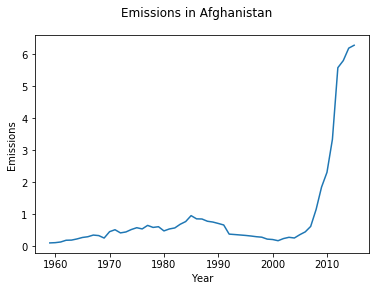

In [15]:
# Basic Viz ideas, borrowed from EORA work

fig, ax = plt.subplots(nrows=1, ncols=1)

# Try switching between these two by commenting out (add #) 
# One or the other
# country_of_interest = "Andorra"
country_of_interest = "Afghanistan"

ax.plot(cdiac_data_sheet[country_of_interest])

fig.suptitle("Emissions in " + country_of_interest)

ax.set_xlabel("Year")
ax.set_ylabel("Emissions")

plt.show()


In [ ]:
### FOR HISTORICAL PURPOSES - I USED THE BELOW TO FORMAT THE DATA ###

In [3]:
os.chdir("/Users/nathansuberi/Desktop/WRI_Programming/Py_Scripts/Data Packs/Materials for Nate")

# Reference from above:
!mkdir temp

os.chdir("temp")

# In order for this to be work, sheet needs to be public
# Or "On, anyone with link can access"
# CDIAC Data
!curl "https://docs.google.com/spreadsheets/d/1vd7NWFmpXJsHNNERowemLEvSoQkpKYFF-AxshdQ3GIE/export#gid=318056468?format=xls" > cdiac_data.xls

dest = os.getcwd()
cdiac_data = pd.ExcelFile(dest + "/cdiac_data.xls")

os.chdir("..")
!rm -r temp

# cdiac_data

sheet_names = cdiac_data.sheet_names
cdiac_dataframes = {}
for name in sheet_names:
    cdiac_dataframes[name] = cdiac_data.parse(name)   
    
##### When you have the excel spreadsheet on your local system,
# access a specific sheet like so:
#list_names = cdiac_data.sheet_names
#zipped = zip(list_names, [0]*len(list_names))

#sheet_names = dict(zipped)

#print(sheet_names)

# For some strange reason, these only work 
# if I don't make the dict above
#a, b = zip(*zipped)
#print(a)
#print(b)

cdiac_dataframes_clean = {}

curr = "Territorial Emissions GCB"
tmp = cdiac_dataframes[curr]

# Remove first informational rows
tmp = tmp.iloc[14:tmp.shape[0],:]

# Replace nan in first row with "Year", set new index
new_index = ["Year"] + list(tmp.index)[1:]
tmp.index = new_index

# Make columns equal to country names
tmp.columns = tmp.iloc[0]
# Drop the row that had the country names
tmp = tmp.drop(["Year"])

# Drops all rows and columns that are completely null
tmp = tmp.dropna(axis=0, how="all")
tmp = tmp.dropna(axis=1, how="all")

# Remove three nan columns at end
# Remove summary rows at bottom
tmp = tmp.iloc[:-2,:-3]

tmp

cdiac_dataframes_clean[curr] = tmp




curr = "Consumption Emissions GCB"
tmp = cdiac_dataframes[curr]

# Remove first informational rows
tmp = tmp.iloc[7:tmp.shape[0],:]

# Replace nan in first row with "Year", set new index
new_index = ["Year"] + list(tmp.index)[1:]
tmp.index = new_index

# Make columns equal to country names
tmp.columns = tmp.iloc[0]
# Drop the row that had the country names
tmp = tmp.drop(["Year"])

# Drops all rows and columns that are completely null
tmp = tmp.dropna(axis=0, how="all")
tmp = tmp.dropna(axis=1, how="all")

# Remove three nan columns at end
# Remove summary rows at bottom
tmp = tmp.iloc[:-2,:-3]

tmp

cdiac_dataframes_clean[curr] = tmp




curr = "Emissions Transfers GCB"
tmp = cdiac_dataframes[curr]

# Remove first informational rows
tmp = tmp.iloc[7:tmp.shape[0],:]

# Replace nan in first row with "Year", set new index
new_index = ["Year"] + list(tmp.index)[1:]
tmp.index = new_index

# Make columns equal to country names
tmp.columns = tmp.iloc[0]
# Drop the row that had the country names
tmp = tmp.drop(["Year"])

# Drops all rows and columns that are completely null
tmp = tmp.dropna(axis=0, how="all")
tmp = tmp.dropna(axis=1, how="all")

# No need to remove anything
# tmp = tmp.iloc[:,:]

tmp

cdiac_dataframes_clean[curr] = tmp





curr = "Territorial Emissions CDIAC"
tmp = cdiac_dataframes[curr]

# Remove first informational rows
tmp = tmp.iloc[13:tmp.shape[0],:]

# Replace nan in first row with "Year", set new index
new_index = ["Year"] + list(tmp.index)[1:]
tmp.index = new_index

# Make columns equal to country names
tmp.columns = tmp.iloc[0]
# Drop the row that had the country names
tmp = tmp.drop(["Year"])

# Drops all rows and columns that are completely null
tmp = tmp.dropna(axis=0, how="all")
tmp = tmp.dropna(axis=1, how="all")

# Remove one nan columns at end
# Remove 8 summary rows from end
tmp = tmp.iloc[:-8,:-1]

tmp

cdiac_dataframes_clean[curr] = tmp



file_dest = os.getcwd()
#pickle.dump(cdiac_dataframes_clean, open(file_dest + "/clean_cdiac_dataframes.pkl", 'wb'))

for file in cdiac_dataframes_clean:
    cdiac_dataframes_clean[file].to_csv(file_dest+"/"+file+".csv")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1428k    0 1428k    0     0   624k      0 --:--:--  0:00:02 --:--:--  624k
